In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def evalPoly(coeff,xData,x):
    n = len(xData) - 1 # Degree of polynomial
    poly = coeff[n]
    #print('poly', round(poly, 2))
    for k in range(1,n+1):
        poly = coeff[n-k] + (x - xData[n-k])*poly
        #print(x - xData[n-k])
    return poly

In [3]:
def coeffts(xData,yData):
    m = len(xData) # Number of data points
    a = yData.copy()
    for k in range(1, len(xData)):
        a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])
        print(a)
    return a

In [4]:
c = np.array([[ 1.79867, 0.78672558, 0.14187667, 0.56903404, 0.79804426, -0.16404872],
[ 1.79867, 0.78672558, -0.75864578, -0.08536923, 0.00286549, -0.16827864],
[ 1.79867, 0.78672558, -0.75864578, 0.39604503, 0.2456488,  0.12299316],
[ 1.79867, 0.78672558, -0.75864578, 0.39604503, -0.10742588, -0.08808125],
[ 1.79867, 0.78672558, -0.75864578, 0.39604503, -0.10742588, 0.01137919]])

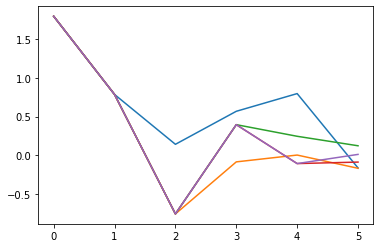

In [5]:
for i in c:
    plt.plot(i)

[ 1.79867     0.78672558  0.14187667  0.56903404  0.79804426 -0.16404872]
[ 1.79867     0.78672558 -0.75864578 -0.08536923  0.00286549 -0.16827864]
[ 1.79867     0.78672558 -0.75864578  0.39604503  0.2456488   0.12299316]
[ 1.79867     0.78672558 -0.75864578  0.39604503 -0.10742588 -0.08808125]
[ 1.79867     0.78672558 -0.75864578  0.39604503 -0.10742588  0.01137919]
coeffts [ 1.8   0.79 -0.76  0.4  -0.11  0.01]
 x yInterp yExact
-----------------------


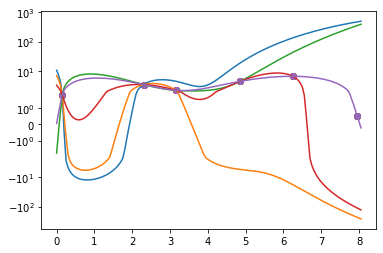

In [7]:
xData = np.array([0.15,2.3,3.15,4.85,6.25,7.95])
#yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])
yData = np.array([1.79867,3.49013,2.2243,4.47313,6.66674,0.51909])
coeff = coeffts(xData,yData)
step = 0.05

print('coeffts', np.round(coeff, 2))
print(" x yInterp yExact")
print("-----------------------")
for i in c:
    Y =[]
    YE = []
    for x in np.arange(0.0,8.1,step):
        y = evalPoly(i,xData,x)
        Y.append(y)
        yExact = 4.8*math.cos(math.pi*x/20.0)
        YE.append(yExact)
        #print('{:3.1f} {:9.5f} {:9.5f}'.format(x,y,yExact))
    plt.plot(np.arange(0.0,8.1,step), Y)
    plt.scatter(xData, yData)
    plt.yscale("symlog")
plt.show()

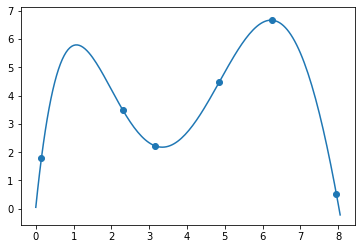

In [8]:
plt.plot(np.arange(0.0,8.1,step), Y)
plt.scatter(xData, yData)

In [9]:
def neville(xData,yData,x):
    m = len(xData) # number of data points
    y = yData.copy()
    for k in range(1,m):
        y[0:m-k] = ((x - xData[k:m])*y[0:m-k] + \
        (xData[0:m-k] - x)*y[1:m-k+1])/ \
        (xData[0:m-k] - xData[k:m])
    return y[0]

[ 1.79867     0.78672558  0.14187667  0.56903404  0.79804426 -0.16404872]
[ 1.79867     0.78672558 -0.75864578 -0.08536923  0.00286549 -0.16827864]
[ 1.79867     0.78672558 -0.75864578  0.39604503  0.2456488   0.12299316]
[ 1.79867     0.78672558 -0.75864578  0.39604503 -0.10742588 -0.08808125]
[ 1.79867     0.78672558 -0.75864578  0.39604503 -0.10742588  0.01137919]
coeffts [ 1.8   0.79 -0.76  0.4  -0.11  0.01]
 x yInterp yExact
-----------------------


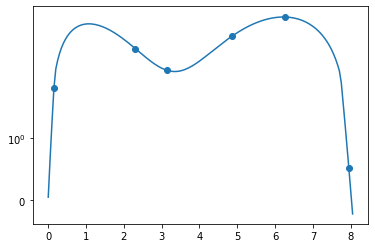

In [10]:
xData = np.array([0.15,2.3,3.15,4.85,6.25,7.95])
#yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])
yData = np.array([1.79867,3.49013,2.2243,4.47313,6.66674,0.51909])
coeff = coeffts(xData,yData)
step = 0.05

print('coeffts', np.round(coeff, 2))
print(" x yInterp yExact")
print("-----------------------")

Y =[]
YE = []
for x in np.arange(0.0,8.1,step):
    y = neville(xData, yData, x)
    Y.append(y)
    yExact = 4.8*math.cos(math.pi*x/20.0)
    YE.append(yExact)
    #print('{:3.1f} {:9.5f} {:9.5f}'.format(x,y,yExact))
plt.plot(np.arange(0.0,8.1,step), Y)
plt.scatter(xData, yData)
plt.yscale("symlog")
plt.show()